In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname
                           , filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [22]:
#cat_directory = '/data/lunar/training/catalogs/'
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [24]:
row = cat.iloc[6]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f');
arrival_time

datetime.datetime(1970, 6, 26, 20, 1)

In [25]:
arrival_time_relative = row['time_rel(sec)']
arrival_time_relative

np.float64(72060.0)

In [26]:
file_name = row['filename']
file_name

'xa.s12.00.mhz.1970-06-26HR00_evid00009'

In [28]:
#data_directory = '/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{file_name}.csv'
data_cat = pd.read_csv(csv_file)
data_cat.head(10)

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-06-26T00:00:00.116000,0.000000,-6.727977e-16
1,1970-06-26T00:00:00.266943,0.150943,-8.646711e-16
2,1970-06-26T00:00:00.417887,0.301887,-9.298738e-16
3,1970-06-26T00:00:00.568830,0.452830,-8.589095e-16
4,1970-06-26T00:00:00.719774,0.603774,-7.139047e-16
5,1970-06-26T00:00:00.870717,0.754717,-5.771728e-16
6,1970-06-26T00:00:01.021660,0.905660,-4.922667e-16
7,1970-06-26T00:00:01.172604,1.056604,-4.419111e-16
8,1970-06-26T00:00:01.323547,1.207547,-3.747379e-16
9,1970-06-26T00:00:01.474491,1.358491,-2.542813e-16


In [29]:
csv_relative_times = np.array(data_cat['time_rel(sec)'])
csv_velocity_data = np.array(data_cat['velocity(m/s)'])

csv_relative_times
csv_velocity_data

array([-6.72797656e-16, -8.64671069e-16, -9.29873818e-16, ...,
       -2.79695512e-17, -9.03715592e-17, -2.43939485e-16])

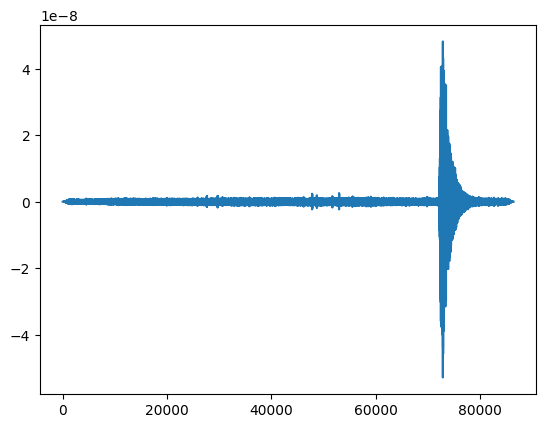

In [30]:
plt.plot(csv_relative_times, csv_velocity_data)

In [31]:
data_directory = './data/lunar/training/data/S12_GradeA/'
mseed_file = f'{data_directory}{file_name}.mseed'
stream_data_from_sensor = read(mseed_file)
stream_data_from_sensor.traces[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-06-26T00:00:00.116000Z
         endtime: 1970-06-27T00:00:03.436755Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572423
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

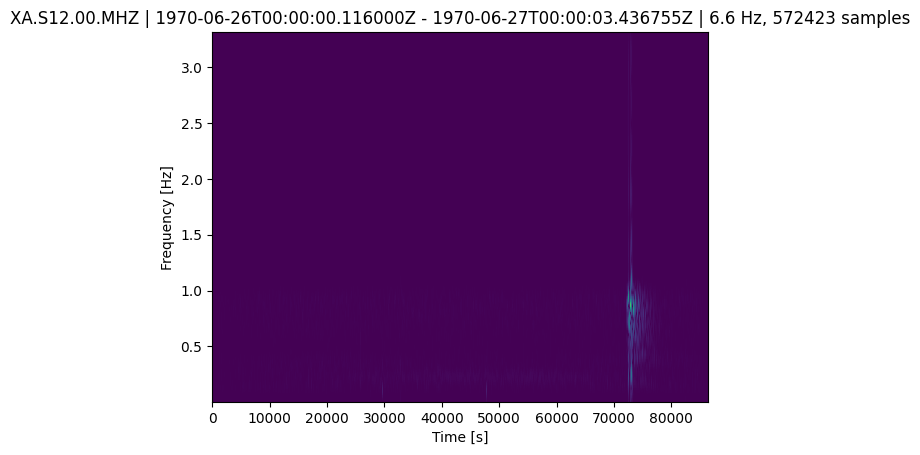

In [32]:
stream_data_from_sensor.traces[0].spectrogram()

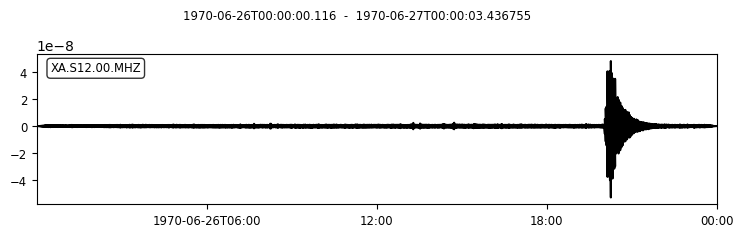

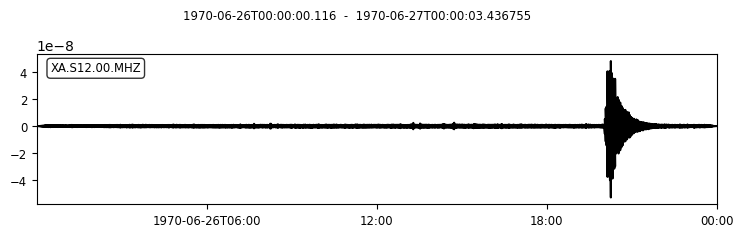

In [33]:
stream_data_from_sensor.traces[0].plot()

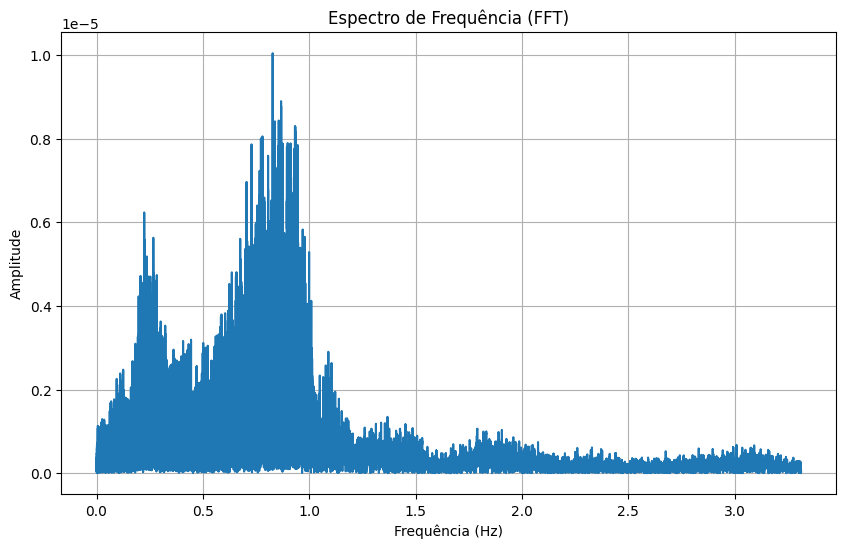

In [34]:
import numpy as np
import matplotlib.pyplot as plt

my_trace_data = stream_data_from_sensor.traces[0].data
my_trace_sampling_rate = stream_data_from_sensor.traces[0].stats.sampling_rate

# Realizar a FFT
fft_values = np.fft.fft(my_trace_data)

# Calcular as frequências correspondentes
frequencies = np.fft.fftfreq(len(my_trace_data), d=1/my_trace_sampling_rate)

# Apenas a metade positiva (porque a FFT resulta em frequências simétricas)
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft_values = np.abs(fft_values[:len(fft_values)//2])

# Plotar o espectro de frequências
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_fft_values)
plt.title("Espectro de Frequência (FFT)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

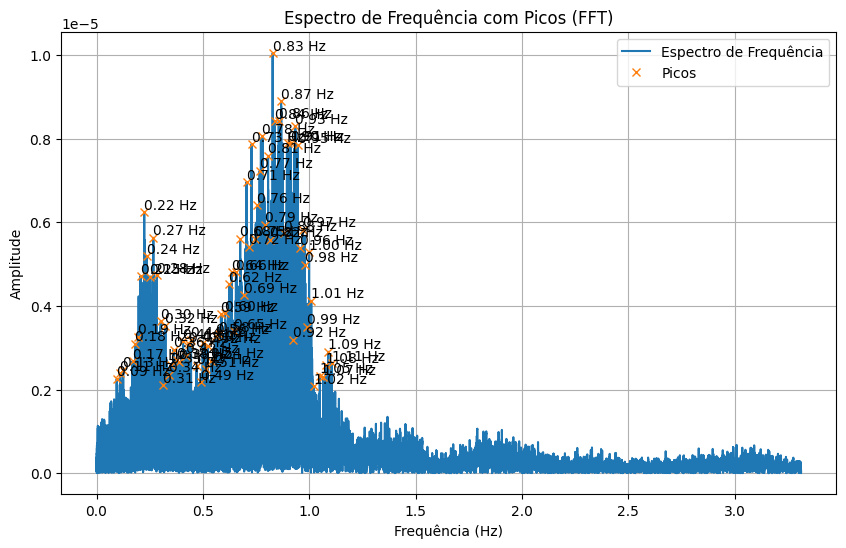

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Manter apenas a metade positiva
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft_values = np.abs(fft_values[:len(fft_values)//2])

# Encontrar os picos (frequências proeminentes)
# Você pode ajustar a altura mínima ou a distância mínima entre os picos
peaks, _ = find_peaks(positive_fft_values, height=(0.2e-5, 2e-5), 
                      distance=0.01 * len(my_trace_data) / my_trace_sampling_rate)

# Plotar o espectro de frequência
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_fft_values, label='Espectro de Frequência')

# Plotar os picos
plt.plot(positive_freqs[peaks], positive_fft_values[peaks], "x", label='Picos')

# Destacar os picos no gráfico
for peak in peaks:
    plt.text(positive_freqs[peak], positive_fft_values[peak], 
             f'{positive_freqs[peak]:.2f} Hz', 
             horizontalalignment='left', verticalalignment='bottom')

plt.title("Espectro de Frequência com Picos (FFT)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()


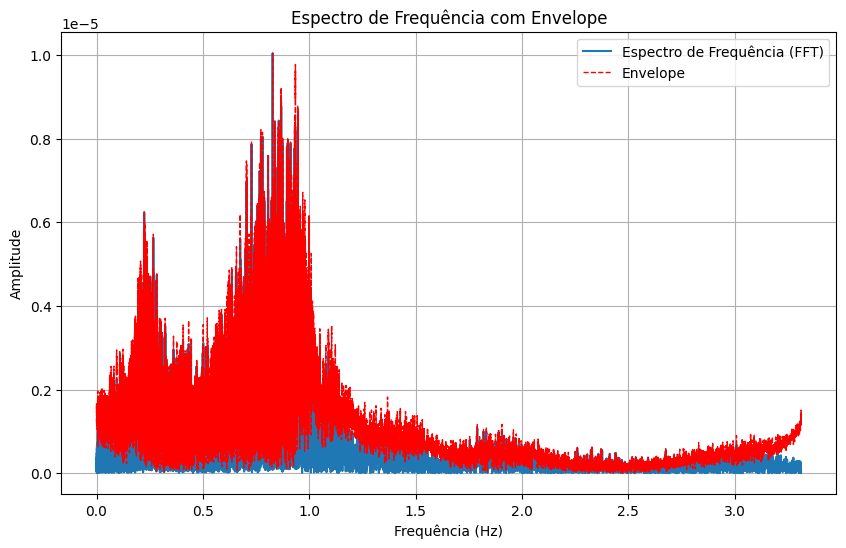

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Aplicar a Transformada de Hilbert para obter o envelope
hilbert_transform = hilbert(positive_fft_values)
envelope = np.abs(hilbert_transform)

# Plotar o espectro de frequência
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_fft_values, label='Espectro de Frequência (FFT)')

# Plotar o envelope com uma linha tênue e pontilhada
plt.plot(positive_freqs, envelope, label='Envelope', linestyle='--', color='red', linewidth=1)

plt.title("Espectro de Frequência com Envelope")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

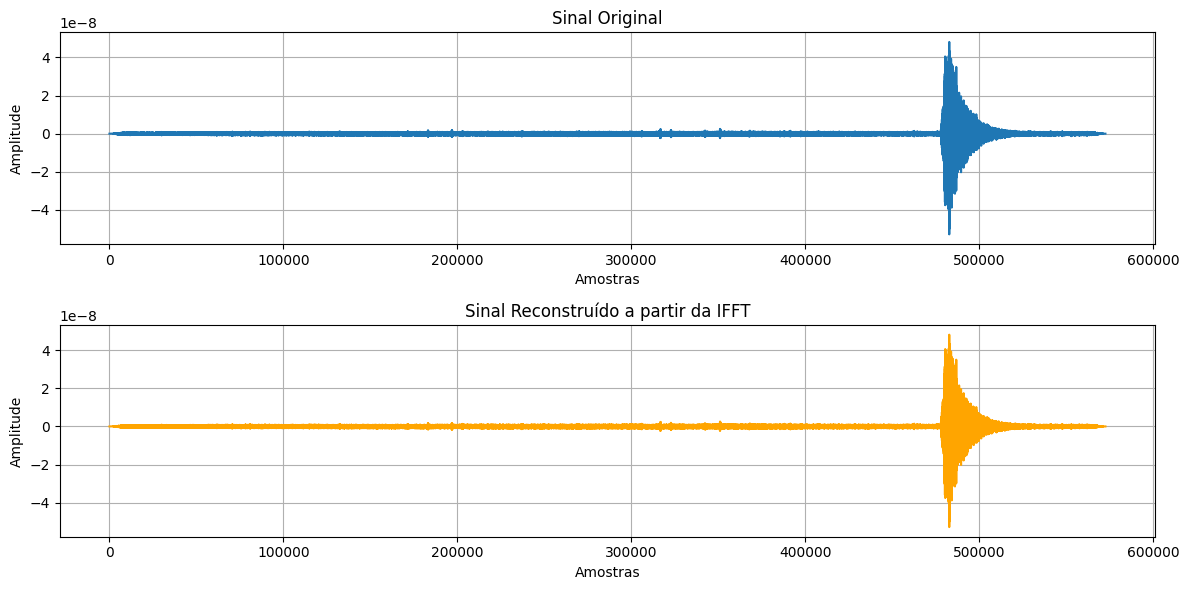

In [37]:
# Aplicar a IFFT para reconstruir o sinal original
reconstructed_signal = np.fft.ifft(fft_values)

# Como a IFFT pode retornar números complexos devido a erros numéricos,
# tomamos apenas a parte real do sinal reconstruído
reconstructed_signal = np.real(reconstructed_signal)

# Plotar o sinal original e o sinal reconstruído
plt.figure(figsize=(12, 6))

# Sinal original
plt.subplot(2, 1, 1)
plt.plot(my_trace_data, label="Sinal Original")
plt.title("Sinal Original")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()

# Sinal reconstruído
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label="Sinal Reconstruído", color='orange')
plt.title("Sinal Reconstruído a partir da IFFT")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

Analisando o arquivo: xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed


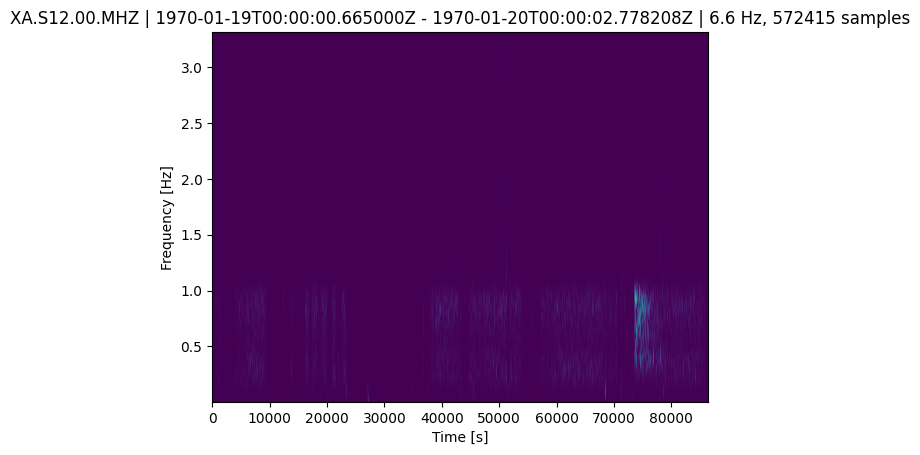

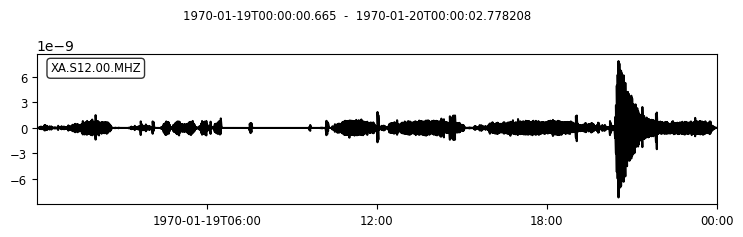

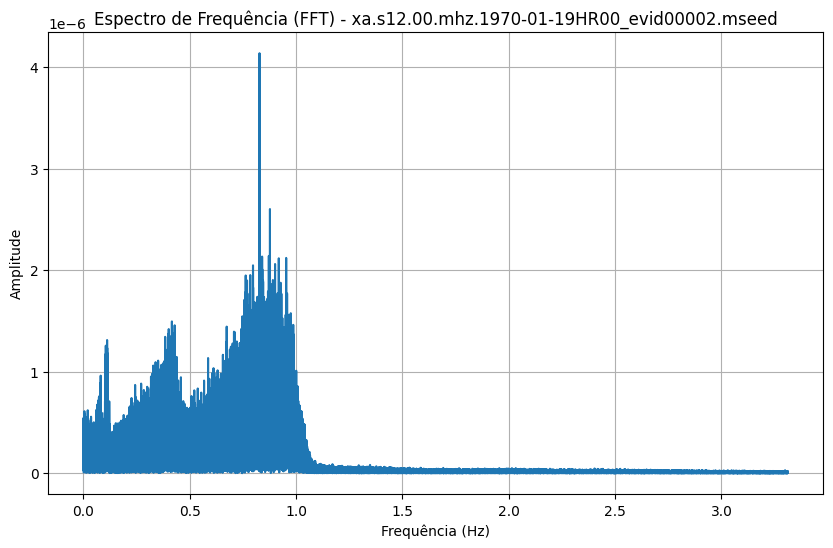

: 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# Caminho da pasta que contém os arquivos .mseed
data_directory = './data/lunar/training/data/S12_GradeA/'

# Lista todos os arquivos .mseed na pasta
files = [f for f in os.listdir(data_directory) if f.endswith('.mseed')]

# Iterar sobre cada arquivo .mseed
for mseed_file in files:
    full_path = os.path.join(data_directory, mseed_file)
    
    # Ler o arquivo .mseed
    stream_data_from_sensor = read(full_path)
    stream_data_from_sensor.traces[0].stats
    
    # Gerar os gráficos
    print(f"Analisando o arquivo: {mseed_file}")
    
    # Gerar o espectrograma
    stream_data_from_sensor.traces[0].spectrogram()
    
    # Plotar o gráfico do sinal temporal
    stream_data_from_sensor.traces[0].plot()
    
    # Dados da FFT
    my_trace_data = stream_data_from_sensor.traces[0].data
    my_trace_sampling_rate = stream_data_from_sensor.traces[0].stats.sampling_rate
    
    # Realizar a FFT
    fft_values = np.fft.fft(my_trace_data)
    
    # Calcular as frequências correspondentes
    frequencies = np.fft.fftfreq(len(my_trace_data), d=1/my_trace_sampling_rate)
    
    # Apenas a metade positiva (porque a FFT resulta em frequências simétricas)
    positive_freqs = frequencies[:len(frequencies)//2]
    positive_fft_values = np.abs(fft_values[:len(fft_values)//2])
    
    # Plotar o espectro de frequências
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_fft_values)
    plt.title(f"Espectro de Frequência (FFT) - {mseed_file}")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()
    
    # Aguardar o usuário pressionar Enter para ir para o próximo arquivo
    #input("Pressione Enter para continuar para o próximo arquivo...")


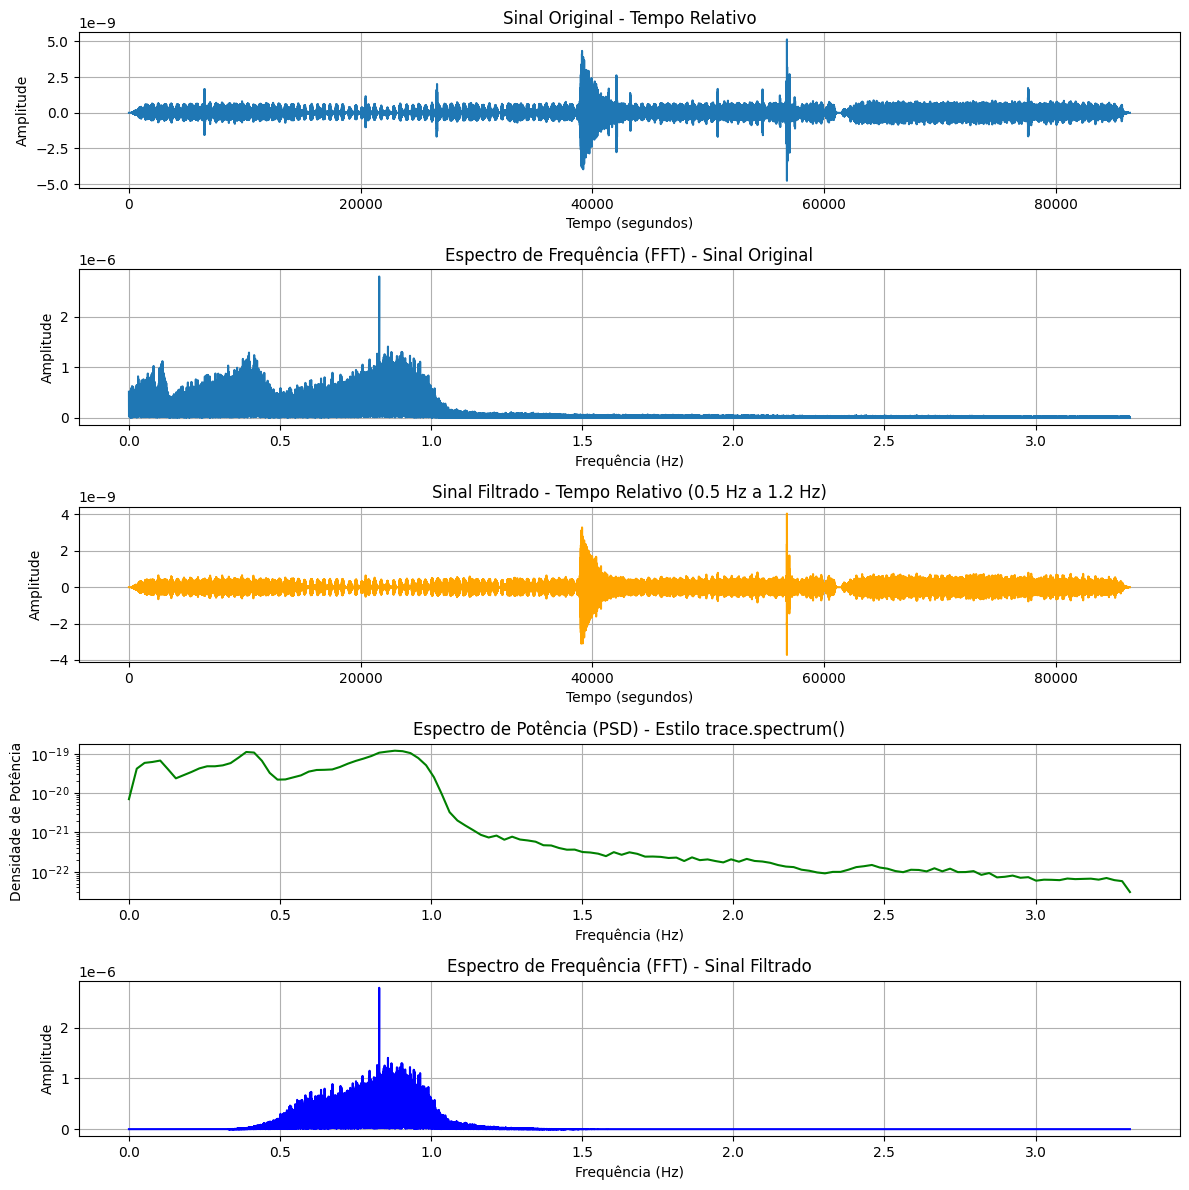

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
from obspy import read

# Função para criar e aplicar um filtro Butterworth passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Caminho do arquivo .mseed
mseed_file = '/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-04-03HR00_evid00021.mseed'

# Ler o arquivo .mseed
stream_data_from_sensor = read(mseed_file)
trace = stream_data_from_sensor.traces[0]
sampling_rate = trace.stats.sampling_rate
time = np.arange(0, len(trace.data)) / sampling_rate  # Criar um eixo de tempo relativo

# Parâmetros do filtro passa-banda (0.5 Hz a 1.2 Hz)
lowcut = 0.5  # Frequência de corte inferior
highcut = 1.2  # Frequência de corte superior

# Aplicar o filtro passa-banda
filtered_data = apply_bandpass_filter(trace.data, lowcut, highcut, sampling_rate)

# ----------------------- Gráficos -----------------------
plt.figure(figsize=(12, 12))

# 1. Gráfico do sinal original no tempo (em tempo relativo)
plt.subplot(5, 1, 1)
plt.plot(time, trace.data, label='Sinal Original')
plt.title("Sinal Original - Tempo Relativo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Amplitude")
plt.grid()

# 2. Espectro de frequência do sinal original (FFT)
fft_values = np.fft.fft(trace.data)
frequencies = np.fft.fftfreq(len(trace.data), d=1/sampling_rate)
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft_values = np.abs(fft_values[:len(frequencies)//2])

plt.subplot(5, 1, 2)
plt.plot(positive_freqs, positive_fft_values, label='Espectro de Frequência (FFT)')
plt.title("Espectro de Frequência (FFT) - Sinal Original")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid()

# 3. Gráfico do sinal filtrado (dados filtrados no tempo relativo)
plt.subplot(5, 1, 3)
plt.plot(time, filtered_data, label='Sinal Filtrado (0.5 Hz a 1.2 Hz)', color='orange')
plt.title("Sinal Filtrado - Tempo Relativo (0.5 Hz a 1.2 Hz)")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Amplitude")
plt.grid()

# 4. Espectro de Potência (Estilo trace.spectrum())
frequencies_psd, power_spectral_density = welch(trace.data, fs=sampling_rate, nperseg=256)

plt.subplot(5, 1, 4)
plt.semilogy(frequencies_psd, power_spectral_density, label='Espectro de Potência (PSD)', color='green')
plt.title("Espectro de Potência (PSD) - Estilo trace.spectrum()")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Densidade de Potência")
plt.grid()

# 5. Espectro de Frequência (FFT) do sinal filtrado
fft_filtered = np.fft.fft(filtered_data)
positive_fft_filtered = np.abs(fft_filtered[:len(frequencies)//2])

plt.subplot(5, 1, 5)
plt.plot(positive_freqs, positive_fft_filtered, label='Espectro de Frequência (FFT) - Sinal Filtrado', color='blue')
plt.title("Espectro de Frequência (FFT) - Sinal Filtrado")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


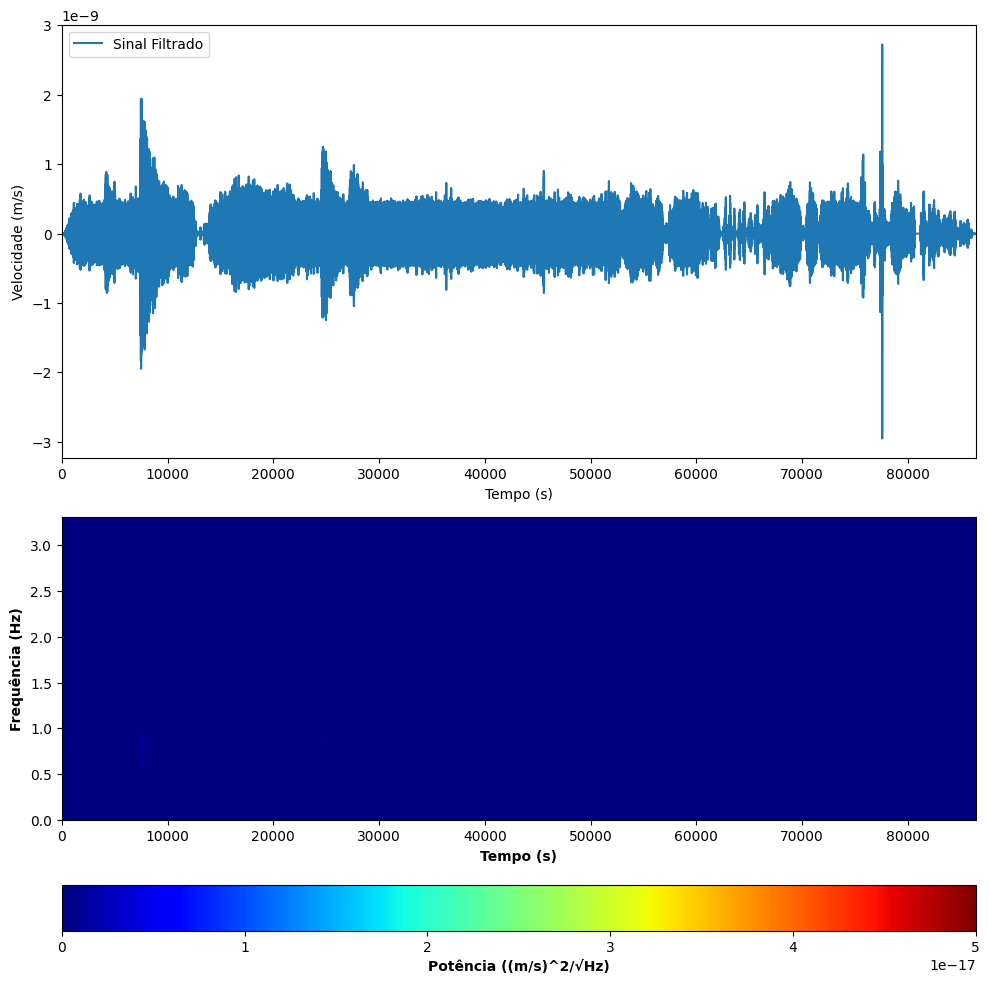

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, spectrogram
from obspy import read
from matplotlib import cm

# Função para criar e aplicar um filtro Butterworth passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Caminho do arquivo .mseed
mseed_file = '/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-01-09HR00_evid00007.mseed'

# Ler o arquivo .mseed
stream_data_from_sensor = read(mseed_file)
trace = stream_data_from_sensor.traces[0]
sampling_rate = trace.stats.sampling_rate
time = np.arange(0, len(trace.data)) / sampling_rate  # Criar um eixo de tempo relativo

# Parâmetros do filtro passa-banda (0.5 Hz a 1.2 Hz)
lowcut = 0.5  # Frequência de corte inferior
highcut = 1.2  # Frequência de corte superior

# Aplicar o filtro passa-banda
filtered_data = apply_bandpass_filter(trace.data, lowcut, highcut, sampling_rate)

# Definir um "arrival time" (exemplo arbitrário)
arrival = 100  # Ponto no tempo de chegada do evento sísmico

# ----------------------- Cálculo do Espectrograma -----------------------
# Usar a função spectrogram da SciPy para criar o espectrograma
frequencies, times, sxx = spectrogram(filtered_data, fs=sampling_rate)

# ----------------------- Gráficos -----------------------
fig = plt.figure(figsize=(10, 10))

# 1. Plot do sinal filtrado no tempo
ax = plt.subplot(2, 1, 1)
ax.plot(time, filtered_data, label='Sinal Filtrado')
ax.legend(loc='upper left')

# Tornar o gráfico mais bonito
ax.set_xlim([min(time), max(time)])
ax.set_ylabel('Velocidade (m/s)')
ax.set_xlabel('Tempo (s)')

# 2. Plot do Espectrograma
ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(times, frequencies, sxx, cmap=cm.jet, shading='gouraud', vmax=5e-17)

# Ajustes no espectrograma
ax2.set_xlim([min(time), max(time)])
ax2.set_xlabel('Tempo (s)', fontweight='bold')
ax2.set_ylabel('Frequência (Hz)', fontweight='bold')

# Barra de cores para representar a potência do espectrograma
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Potência ((m/s)^2/√Hz)', fontweight='bold')

plt.tight_layout()
plt.show()


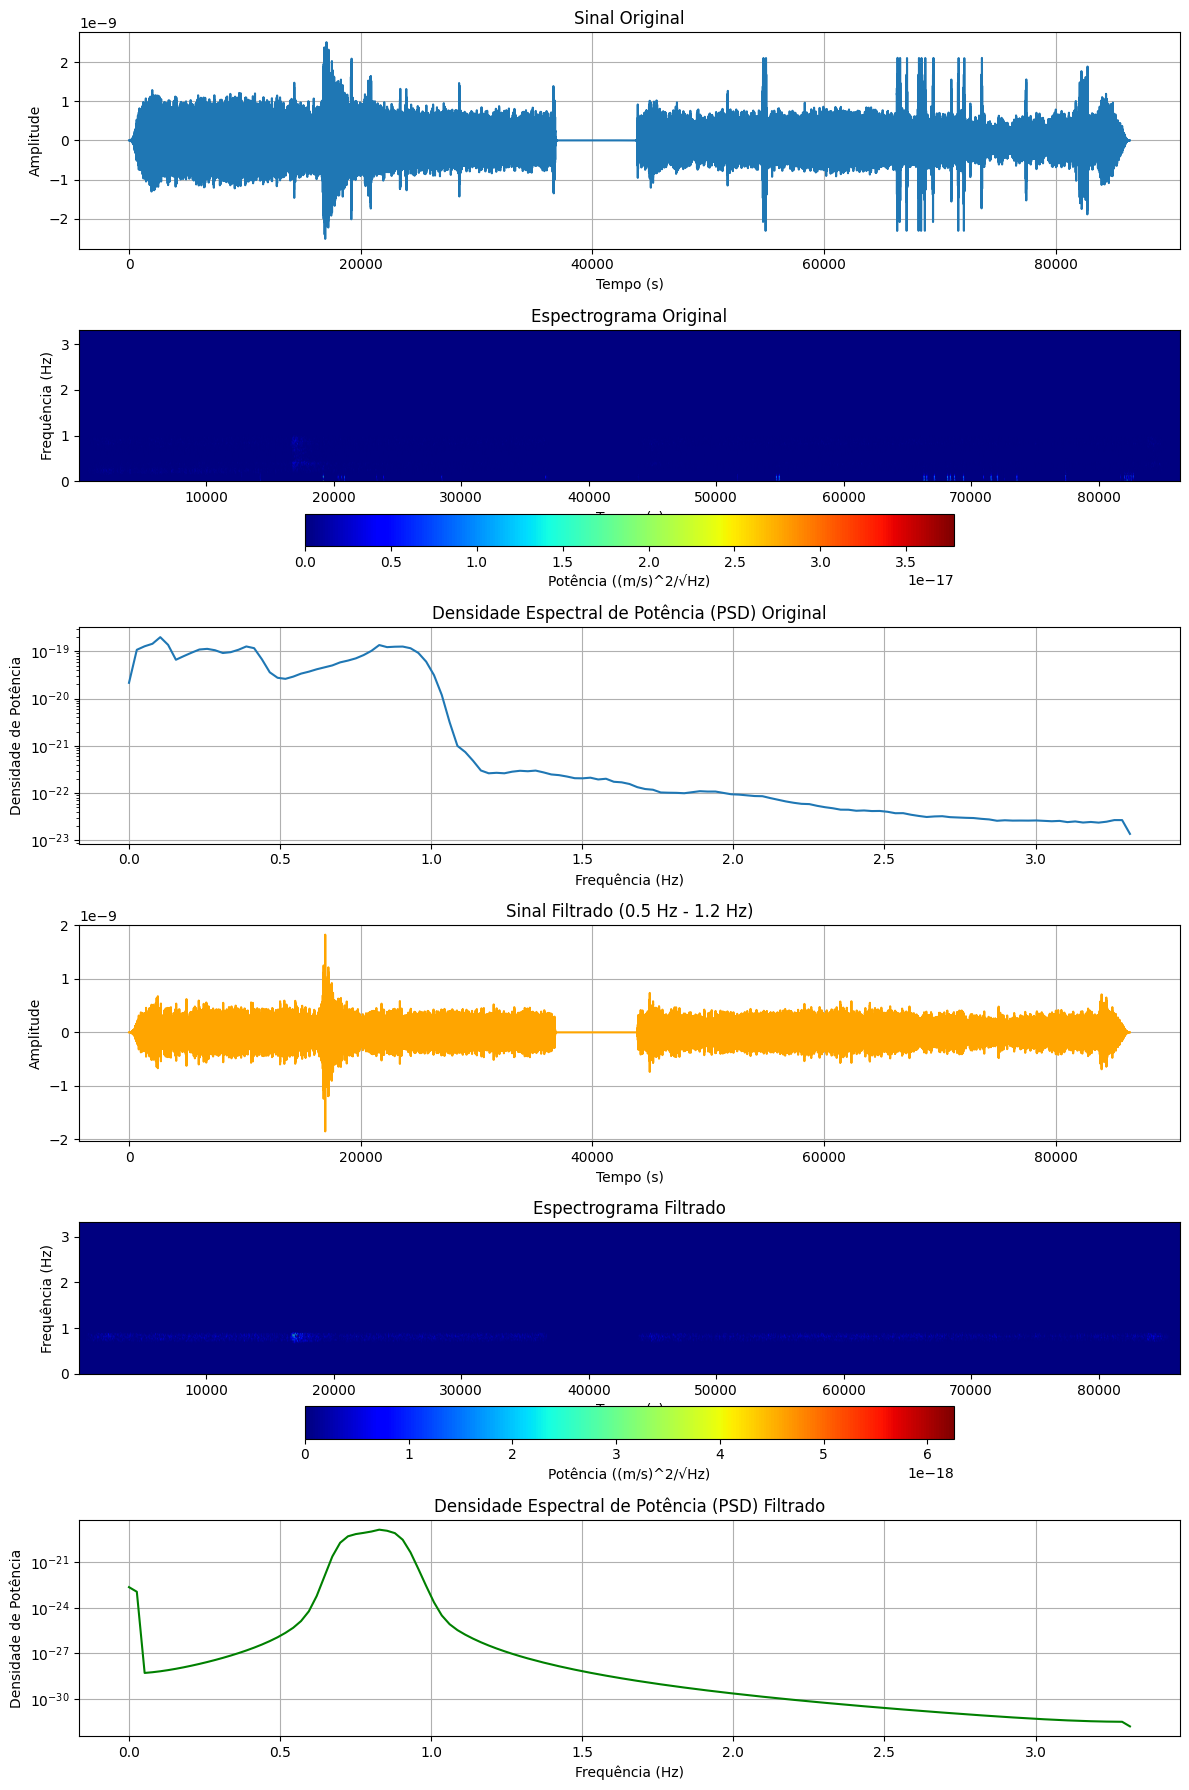

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, spectrogram
from obspy import read
from matplotlib import cm

# Função para criar e aplicar um filtro Butterworth passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Caminho do arquivo .mseed
mseed_file = '/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-05-24HR00_evid00028.mseed'

# Ler o arquivo .mseed
stream_data_from_sensor = read(mseed_file)
trace = stream_data_from_sensor.traces[0]
sampling_rate = trace.stats.sampling_rate
time = np.arange(0, len(trace.data)) / sampling_rate  # Criar um eixo de tempo relativo

# Parâmetros do filtro passa-banda (0.5 Hz a 1.2 Hz)
lowcut = 0.7  # Frequência de corte inferior
highcut = 0.9  # Frequência de corte superior

# Aplicar o filtro passa-banda ao sinal
filtered_data = apply_bandpass_filter(trace.data, lowcut, highcut, sampling_rate)

# ----------------------- Cálculo do Espectrograma e PSD -----------------------
# Espectrograma para o sinal original
frequencies_orig, times_orig, sxx_orig = spectrogram(trace.data, fs=sampling_rate)

# Espectrograma para o sinal filtrado
frequencies_filt, times_filt, sxx_filt = spectrogram(filtered_data, fs=sampling_rate)

# PSD (Densidade Espectral de Potência) para o sinal original
frequencies_psd_orig, psd_orig = welch(trace.data, fs=sampling_rate, nperseg=256)

# PSD (Densidade Espectral de Potência) para o sinal filtrado
frequencies_psd_filt, psd_filt = welch(filtered_data, fs=sampling_rate, nperseg=256)

# ----------------------- Gráficos -----------------------
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# 1. Sinal Original no tempo
axs[0].plot(time, trace.data, label='Sinal Original')
axs[0].set_title('Sinal Original')
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# 2. Espectrograma Original
vals = axs[1].pcolormesh(times_orig, frequencies_orig, sxx_orig, cmap=cm.jet, shading='gouraud')
axs[1].set_title('Espectrograma Original')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Frequência (Hz)')
cbar = plt.colorbar(vals, ax=axs[1], orientation='horizontal')
cbar.set_label('Potência ((m/s)^2/√Hz)')

# 3. PSD Original
axs[2].semilogy(frequencies_psd_orig, psd_orig, label='PSD Original')
axs[2].set_title('Densidade Espectral de Potência (PSD) Original')
axs[2].set_xlabel('Frequência (Hz)')
axs[2].set_ylabel('Densidade de Potência')
axs[2].grid(True)

# 4. Sinal Filtrado no tempo
axs[3].plot(time, filtered_data, label='Sinal Filtrado', color='orange')
axs[3].set_title('Sinal Filtrado (0.5 Hz - 1.2 Hz)')
axs[3].set_xlabel('Tempo (s)')
axs[3].set_ylabel('Amplitude')
axs[3].grid(True)

# 5. Espectrograma Filtrado
vals_filt = axs[4].pcolormesh(times_filt, frequencies_filt, sxx_filt, cmap=cm.jet, shading='gouraud')
axs[4].set_title('Espectrograma Filtrado')
axs[4].set_xlabel('Tempo (s)')
axs[4].set_ylabel('Frequência (Hz)')
cbar_filt = plt.colorbar(vals_filt, ax=axs[4], orientation='horizontal')
cbar_filt.set_label('Potência ((m/s)^2/√Hz)')

# 6. PSD Filtrado
axs[5].semilogy(frequencies_psd_filt, psd_filt, label='PSD Filtrado', color='green')
axs[5].set_title('Densidade Espectral de Potência (PSD) Filtrado')
axs[5].set_xlabel('Frequência (Hz)')
axs[5].set_ylabel('Densidade de Potência')
axs[5].grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


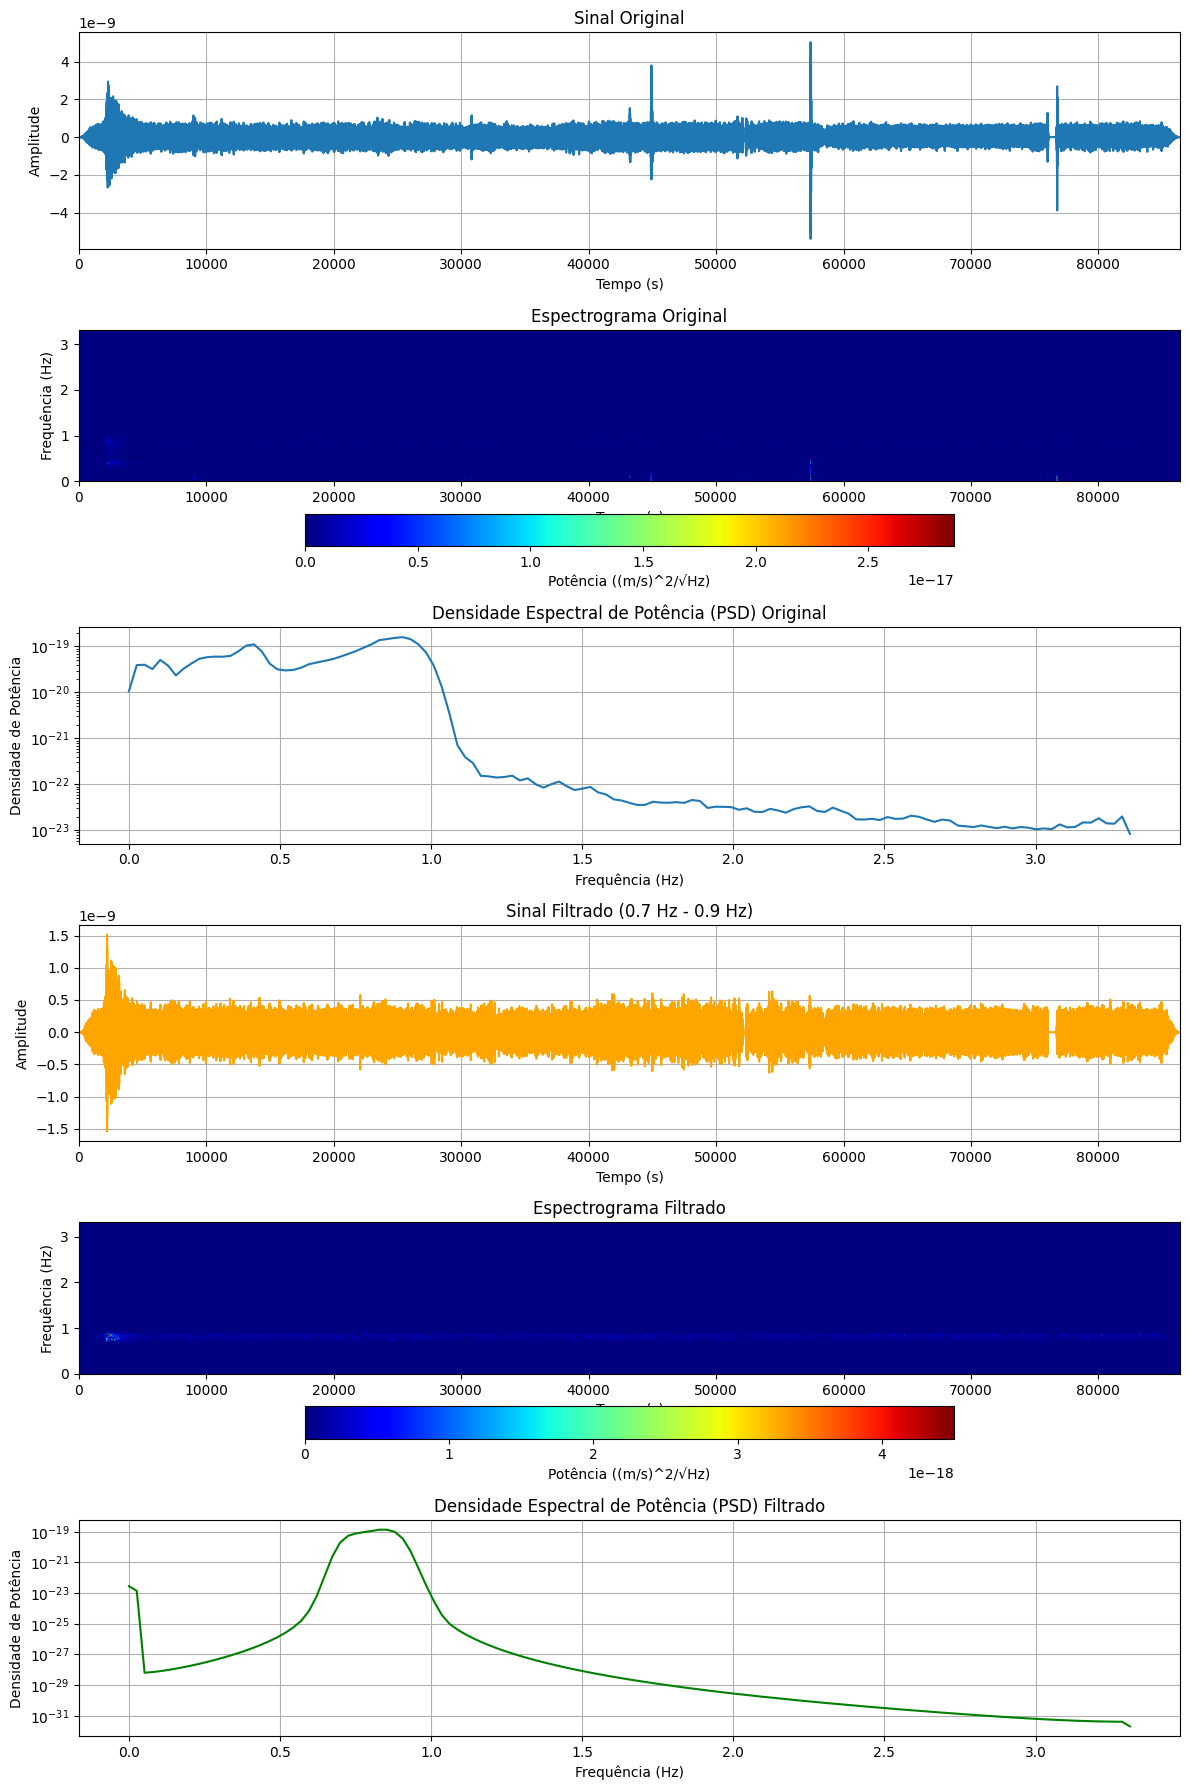

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, spectrogram
from obspy import read
from matplotlib import cm

# Função para criar e aplicar um filtro Butterworth passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Caminho do arquivo .mseed
# mseed_file = '/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1977-04-24HR00_evid00923.mseed'
mseed_file = './data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-07-18HR00_evid00036.mseed'

# Ler o arquivo .mseed
stream_data_from_sensor = read(mseed_file)
trace = stream_data_from_sensor.traces[0]
sampling_rate = trace.stats.sampling_rate
time = np.arange(0, len(trace.data)) / sampling_rate  # Criar um eixo de tempo relativo

# Parâmetros do filtro passa-banda (0.5 Hz a 1.2 Hz)
lowcut = 0.7  # Frequência de corte inferior
highcut = 0.9  # Frequência de corte superior

# Aplicar o filtro passa-banda ao sinal
filtered_data = apply_bandpass_filter(trace.data, lowcut, highcut, sampling_rate)

# ----------------------- Cálculo do Espectrograma e PSD -----------------------
# Espectrograma para o sinal original
frequencies_orig, times_orig, sxx_orig = spectrogram(trace.data, fs=sampling_rate)

# Espectrograma para o sinal filtrado
frequencies_filt, times_filt, sxx_filt = spectrogram(filtered_data, fs=sampling_rate)

# PSD (Densidade Espectral de Potência) para o sinal original
frequencies_psd_orig, psd_orig = welch(trace.data, fs=sampling_rate, nperseg=256)

# PSD (Densidade Espectral de Potência) para o sinal filtrado
frequencies_psd_filt, psd_filt = welch(filtered_data, fs=sampling_rate, nperseg=256)

# ----------------------- Gráficos -----------------------
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Ajustar o limite de tempo para todos os gráficos
x_min, x_max = min(time), max(time)

# 1. Sinal Original no tempo
axs[0].plot(time, trace.data, label='Sinal Original')
axs[0].set_title('Sinal Original')
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)
axs[0].set_xlim(x_min, x_max)

# 2. Espectrograma Original
vals = axs[1].pcolormesh(times_orig, frequencies_orig, sxx_orig, cmap=cm.jet, shading='gouraud')
axs[1].set_title('Espectrograma Original')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Frequência (Hz)')
axs[1].set_xlim(x_min, x_max)
cbar = plt.colorbar(vals, ax=axs[1], orientation='horizontal')
cbar.set_label('Potência ((m/s)^2/√Hz)')

# 3. PSD Original
axs[2].semilogy(frequencies_psd_orig, psd_orig, label='PSD Original')
axs[2].set_title('Densidade Espectral de Potência (PSD) Original')
axs[2].set_xlabel('Frequência (Hz)')
axs[2].set_ylabel('Densidade de Potência')
axs[2].grid(True)

# 4. Sinal Filtrado no tempo
axs[3].plot(time, filtered_data, label='Sinal Filtrado', color='orange')
axs[3].set_title(f'Sinal Filtrado ({lowcut} Hz - {highcut} Hz)')
axs[3].set_xlabel('Tempo (s)')
axs[3].set_ylabel('Amplitude')
axs[3].grid(True)
axs[3].set_xlim(x_min, x_max)

# 5. Espectrograma Filtrado
vals_filt = axs[4].pcolormesh(times_filt, frequencies_filt, sxx_filt, cmap=cm.jet, shading='gouraud')
axs[4].set_title('Espectrograma Filtrado')
axs[4].set_xlabel('Tempo (s)')
axs[4].set_ylabel('Frequência (Hz)')
axs[4].set_xlim(x_min, x_max)
cbar_filt = plt.colorbar(vals_filt, ax=axs[4], orientation='horizontal')
cbar_filt.set_label('Potência ((m/s)^2/√Hz)')

# 6. PSD Filtrado
axs[5].semilogy(frequencies_psd_filt, psd_filt, label='PSD Filtrado', color='green')
axs[5].set_title('Densidade Espectral de Potência (PSD) Filtrado')
axs[5].set_xlabel('Frequência (Hz)')
axs[5].set_ylabel('Densidade de Potência')
axs[5].grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


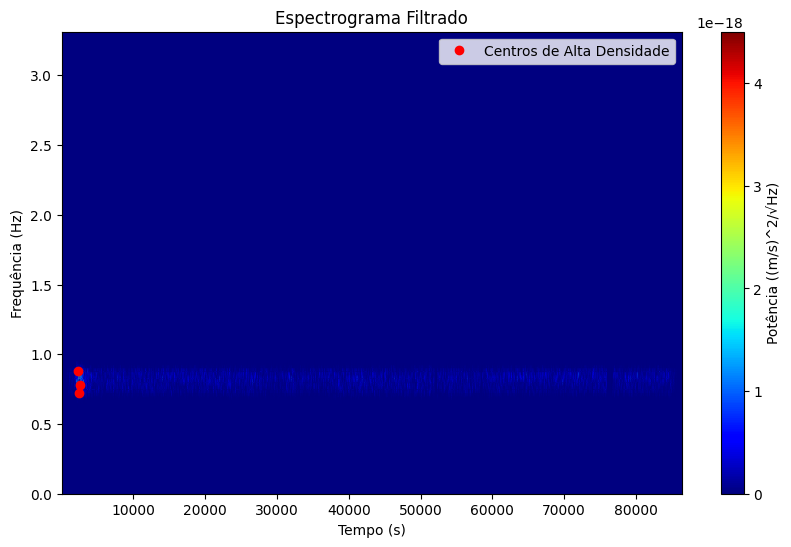

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, spectrogram
from obspy import read
from skimage.feature import peak_local_max
from matplotlib import cm

# Função para criar e aplicar um filtro Butterworth passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Caminho do arquivo .mseed
mseed_file = './data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-07-18HR00_evid00036.mseed'

# Ler o arquivo .mseed
stream_data_from_sensor = read(mseed_file)
trace = stream_data_from_sensor.traces[0]
sampling_rate = trace.stats.sampling_rate

# Filtrar o sinal
lowcut = 0.7  # Frequência de corte inferior
highcut = 0.9  # Frequência de corte superior
filtered_data = apply_bandpass_filter(trace.data, lowcut, highcut, sampling_rate)

# Calcular o Espectrograma
frequencies, times, sxx = spectrogram(filtered_data, fs=sampling_rate)

# Localizar picos no espectrograma usando a função peak_local_max
# threshold_rel define o nível mínimo relativo para considerar um pico
peaks = peak_local_max(sxx, min_distance=5, threshold_rel=0.6)  # Ajuste o threshold para maior sensibilidade

# ----------------------- Gráfico -----------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Espectrograma Filtrado
vals = ax.pcolormesh(times, frequencies, sxx, cmap=cm.jet, shading='gouraud')
ax.set_title('Espectrograma Filtrado')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Frequência (Hz)')
cbar = plt.colorbar(vals, ax=ax)
cbar.set_label('Potência ((m/s)^2/√Hz)')

# Plotar os picos (centros das "bolinhas")
peak_times = times[peaks[:, 1]]
peak_frequencies = frequencies[peaks[:, 0]]

ax.plot(peak_times, peak_frequencies, 'ro', label='Centros de Alta Densidade')
ax.legend()

plt.show()


In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error, accuracy_score
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, spectrogram
from obspy import read
from skimage.feature import peak_local_max
from matplotlib import cm

predicted_times = []

# Função para criar e aplicar um filtro Butterworth passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Caminho do arquivo .mseed
mseed_directory = './data/lunar/training/data/S12_GradeA' #xa.s12.00.mhz.1977-04-24HR00_evid00923.mseed'

# Listar todos os arquivos .mseed na pasta
for filename in os.listdir(mseed_directory):
    if filename.endswith('.mseed'):
        mseed_file = os.path.join(mseed_directory, filename)
        
        # Ler o arquivo .mseed
        stream_data_from_sensor = read(mseed_file)
        trace = stream_data_from_sensor.traces[0]
        sampling_rate = trace.stats.sampling_rate
        time = np.arange(0, len(trace.data)) / sampling_rate  # Criar um eixo de tempo relativo

        # Parâmetros do filtro passa-banda (0.5 Hz a 1.2 Hz)
        lowcut = 0.7  # Frequência de corte inferior
        highcut = 0.9  # Frequência de corte superior

        # Aplicar o filtro passa-banda ao sinal
        filtered_data = apply_bandpass_filter(trace.data, lowcut, highcut, sampling_rate)

        # ----------------------- Cálculo do Espectrograma e PSD -----------------------
        # Espectrograma para o sinal original
        frequencies_orig, times_orig, sxx_orig = spectrogram(trace.data, fs=sampling_rate)

        # Espectrograma para o sinal filtrado
        frequencies_filt, times_filt, sxx_filt = spectrogram(filtered_data, fs=sampling_rate)

        # Localizar picos no espectrograma filtrado usando a função peak_local_max
        peaks = peak_local_max(sxx_filt, min_distance=5, threshold_rel=0.6)  # Ajuste o threshold para maior sensibilidade

        # PSD (Densidade Espectral de Potência) para o sinal original
        #frequencies_psd_orig, psd_orig = welch(trace.data, fs=sampling_rate, nperseg=256)

        # PSD (Densidade Espectral de Potência) para o sinal filtrado
        #frequencies_psd_filt, psd_filt = welch(filtered_data, fs=sampling_rate, nperseg=256)

        # ----------------------- Gráficos -----------------------
        #fig, axs = plt.subplots(1, 1, figsize=(12, 20))
        

        # Ajustar o limite de tempo para todos os gráficos
        #x_min, x_max = min(time), max(time)

        # 6. Espectrograma Filtrado com Picos
        #axs.pcolormesh(times_filt, frequencies_filt, sxx_filt, cmap=cm.jet, shading='gouraud')
        peak_times = times_filt[peaks[:, 1]]
        predicted_times.append(round(peak_times[0], 1))
        peak_frequencies = frequencies_filt[peaks[:, 0]]
        #print(peak_frequencies)
        #print('-'*10)

actual_times = []

def carregar_os_dados_esperados():
    file_path = './data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv'
    data = pd.read_csv(file_path)
    time_rel_values = data['time_rel(sec)'].tolist()
    return time_rel_values


actual_times = carregar_os_dados_esperados()
# Exibindo os primeiros valores reais e previstos

print(f"Primeiro valor real: {actual_times[0]}")
print(f"Primeiro valor previsto: {predicted_times[0]}")

# Cálculo de MAE e RMSE
mape = mean_absolute_percentage_error(actual_times, predicted_times)
mae = mean_absolute_error(actual_times, predicted_times)
rmse = root_mean_squared_error(actual_times, predicted_times)

print(f"MAPE: {mape}")
print(f"MAE: {mae}")
print(f'RMSE: {rmse}')


Primeiro valor real: 73500.0
Primeiro valor previsto: 85223.8
MAPE: 2.1951209021695113
MAE: 27113.281578947368
RMSE: 34352.240870234054
